In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.distributions.constraints as constraints

import pyro
import pyro.infer
import pyro.distributions as dist

from pyro.infer import MCMC, NUTS, Predictive

pyro.set_rng_seed(101)

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [15]:
p_0 = 0.35
n = 10

In [16]:
y = torch.bernoulli(input=torch.ones(size=[n,])*p_0) # torch.tensor -> scalar, but torch.Tensor is a tensor

def bernouilli_model(data):
    p = pyro.sample("p", dist.Beta(concentration1=2, concentration0=2))
    
    return pyro.sample("y", dist.Bernoulli(probs=p), obs=data)

In [18]:
nuts_kernel = NUTS(model=bernouilli_model)
mcmc = MCMC(kernel=nuts_kernel,
                 num_samples=10000,
                 num_chains=1, 
                 warmup_steps=1000)
posterior = mcmc.run(data=y)

Sample: 100%|██████████| 11000/11000 [00:51, 211.67it/s, step size=8.97e-01, acc. prob=0.929]


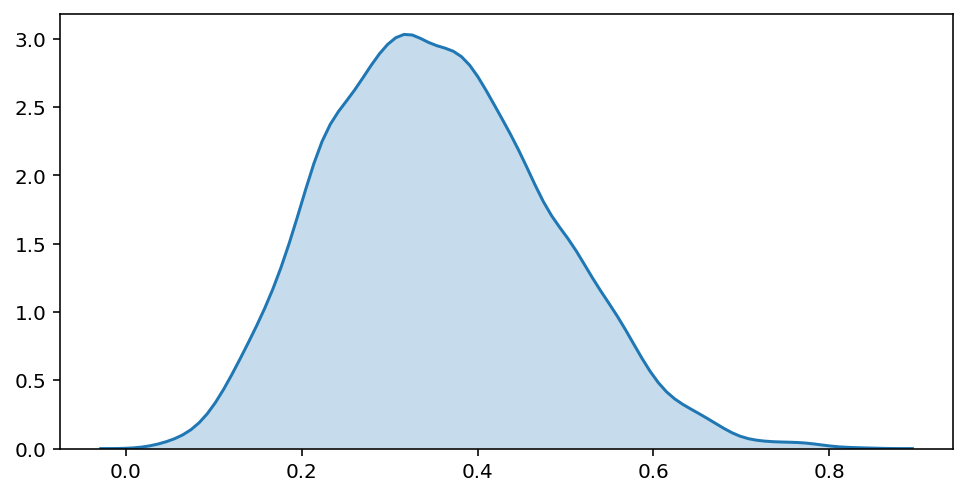

In [21]:
fig = plt.figure(figsize=(8, 4))
sns.kdeplot(mcmc.get_samples()["p"].numpy(), shade=True)